In [80]:
import geopandas 
import pandas as pd
pd.set_option('max_colwidth', 200)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns 
sns.set()
import descartes
%matplotlib inline
from random import sample
from math import sin, cos, sqrt, atan2, radians
import numpy as np
from itertools import cycle, islice


lakes = geopandas.read_file("Lakes_and_Rivers")
madison = geopandas.read_file("City_Limit")


In [81]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', -1)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [3]:
#https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-ridership-by-route-weekday?geometry=-89.671%2C42.985%2C-89.23%2C43.161
weekday_bus = geopandas.read_file("Metro_Transit_Ridership_by_Route_Weekday")



In [39]:
#metro data
metro_data = geopandas.read_file("MetroBusRoutes.gdb")
list_metro = []
for index, row in metro_data.iterrows():
    list_metro.append(Point(float(row["stop_lon"]),float(row["stop_lat"])))

metro_series = pd.Series(list_metro)
metro_coord = pd.DataFrame({"Coordinates": metro_series})
metro_coord = geopandas.GeoDataFrame(metro_coord, geometry='Coordinates')

#BRT data 
#https://data-cityofmadison.opendata.arcgis.com/datasets/bus-rapid-transit-stops
# using new data for brt from the madison data instead of the BRT.gdb
brt_data = geopandas.read_file("Bus_Rapid_Transit_Stops")
list_brt = []
for index, row in brt_data.iterrows():
    list_brt.append(Point(float(row["stop_lon"]),float(row["stop_lat"])))

brt_series = pd.Series(list_brt)
brt_coord = pd.DataFrame({"Coordinates": brt_series})
brt_coord = geopandas.GeoDataFrame(brt_coord, geometry='Coordinates')

#BRT data lines
#http://data-cityofmadison.opendata.arcgis.com/datasets/bus-rapid-transit-system-lines
brt_data_line = geopandas.read_file("Bus_Rapid_Transit_System_Lines")
brt_coord_line = geopandas.GeoDataFrame(brt_data_line, geometry='geometry')


,OBJECTID,Type,Comments,SHAPESTLen,Corridor,Notes,geometry
0,1,main,None,5884.251504,C,None,"LINESTRING (-89.38210166692716 43.07613537470482, -89.38121655300444 43.0767567031364, -89.37870439210381 43.07852007372185, -89.37337227805305 43.08230676515505, -89.36978686870204 43.08482295718..."
1,2,main,None,5587.122267,C,None,"LINESTRING (-89.39256650236116 43.07418718672257, -89.39257261399206 43.07418292181986, -89.39284659201076 43.07399023100096, -89.39376120378594 43.07334696611719, -89.39382815367405 43.0733030183..."
2,3,main,None,20640.279196,W,None,"LINESTRING (-89.41292554985399 43.07355820501506, -89.41329213500565 43.07386482175003, -89.41378751796211 43.07403156642498, -89.41441285506195 43.07413877971055, -89.41524936113291 43.0741745561..."
3,4,main,None,25912.556655,E,None,"LINESTRING (-89.36623543597345 43.08733152949861, -89.36223702360672 43.09011075405972, -89.35929020405788 43.09222720281267, -89.3541134321158 43.09612277834226, -89.34927041308353 43.09972933676..."
4,5,alt,None,16437.002031,N,sherman,"LINESTRING (-89.36365562190602 43.09327617413908, -89.36364974636339 43.09345140252879, -89.36362565398562 43.09367322334594, -89.36360924495223 43.09382429935854, -89.36354603787771 43.0944062407..."
5,6,main,None,25635.863361,S,None,"LINESTRING (-89.40062125991038 43.07328858625558, -89.40060621061447 43.07268492951707, -89.40065827421452 43.0724372607517, -89.40073961626986 43.07206575769861, -89.40082422299024 43.07164186198..."
6,7,ext,None,11497.328499,W,None,"LINESTRING (-89.51749359115981 43.06053640686449, -89.51977450224454 43.06051344773996, -89.52401950873927 43.0604683756604, -89.52756747571064 43.06028059488247, -89.53718817417975 43.06029197332..."
7,8,alt,Odana,14617.197014,W,odana,"LINESTRING (-89.47212124245068 43.06086614624748, -89.47184670810447 43.05965103766952, -89.47182021960009 43.05902232401046, -89.47189119342974 43.05843167306223, -89.47211150743061 43.0577742744..."
8,9,alt,MPR,9536.239344,W,mpr,"LINESTRING (-89.47212124245068 43.06086614624748, -89.47389384030852 43.06085042317108, -89.47612187592075 43.06083986953618, -89.48193945416787 43.06081697644216, -89.48747382717863 43.0608068092..."
9,10,main,None,9551.352524,N,None,"LINESTRING (-89.35521456976421 43.12893803491264, -89.35520478274226 43.12893919930908, -89.34842318819408 43.1287921412062, -89.34834449053596 43.12934221785545, -89.34813890652001 43.12995651238..."


In [5]:
#metro bus route data 2019
#http://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-bus-routes
transit_data = geopandas.read_file("Metro_Transit_Bus_Route_Trips")
transit_data_weekday = transit_data.loc[transit_data['service_na'].isin(['Standard Weekday','Weekday'])]
transit_data_weekday

,OBJECTID,PointsToLi,PointsTo_1,trips_rout,trips_ro_1,trips_ro_2,trips_ro_3,trips_ro_4,trips_ro_5,trips_ro_6,...,saturday,sunday,start_date,end_date,PK_MD_WE,ShapeSTLen,trips_ro20,trips_ro21,trips_ro22,geometry
0,22069,50881,50881,8298,1,85_WKD,874327,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
1,22070,50881,50881,8298,1,85_WKD,874326,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
2,22071,50881,50881,8298,1,85_WKD,874325,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
3,22072,50881,50881,8298,1,85_WKD,874324,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
4,22073,50881,50881,8298,1,85_WKD,874323,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
5,22074,50881,50881,8298,1,85_WKD,874322,CAPITOL SQUARE,0,CapSq,...,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712420362679 43.07218731165621, -89.4255892022808 43.07230831376807, -89.42513320243103 43.072343314370..."
6,22075,50882,50882,8298,1,85_WKD,874328,OLD UNIV AV: VIA CAMPUS,1,Old University,...,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.38210820077526 43.07470536432103, -89.38211420101841 43.07472436425724, -89.38212320051684 43.0747423638..."
7,22076,50882,50882,8298,1,85_WKD,874329,OLD UNIV AV: VIA CAMPUS,1,Old University,...,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.38210820077526 43.07470536432103, -89.38211420101841 43.07472436425724, -89.38212320051684 43.0747423638..."
8,22077,50882,50882,8298,1,85_WKD,874330,OLD UNIV AV: VIA CAMPUS,1,Old University,...,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.38210820077526 43.07470536432103, -89.38211420101841 43.07472436425724, -89.38212320051684 43.0747423638..."
9,22078,50882,50882,8298,1,85_WKD,874331,OLD UNIV AV: VIA CAMPUS,1,Old University,...,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.38210820077526 43.07470536432103, -89.38211420101841 43.07472436425724, -89.38212320051684 43.0747423638..."


In [141]:
#https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-ridership-by-route-weekday?geometry=-89.671%2C42.985%2C-89.23%2C43.161
weekday_bus_with_brt_distance = geopandas.read_file("weekday_bus_with_brt_distance.gpkg")
weekday_bus_with_brt_distance.distance_to_brt = weekday_bus_with_brt_distance.distance_to_brt.astype(float)
unique_value = weekday_bus_with_brt_distance['Route'].unique()
unique_value.sort()
unique_value

array([ 1,  2,  3,  4,  5,  6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 44, 47, 48, 49, 50, 51, 52, 55, 56, 57, 58, 67, 70, 71, 72, 73,
       75, 80, 81, 82, 84], dtype=int64)

In [45]:
#mapping of the point
def mapping(route_number_table):
    for bus_number in route_number_table['Route'].unique():
        row_bus = weekday_bus_with_brt_distance[weekday_bus_with_brt_distance['Route'] == bus_number]  
        weekday_bus_series = pd.Series(row_bus["geometry"])
        weekday_bus_coord = pd.DataFrame({"Coordinates": weekday_bus_series})
        weekday_bus_coord = geopandas.GeoDataFrame(weekday_bus_coord, geometry='Coordinates')
        weekday_bus_coord.plot(color='blue', ax=ax, markersize= 35)

        route_row = transit_data_weekday[transit_data_weekday['trips_ro_1'] == bus_number]
        list_weekday_bus = []
        for index, row in route_row.iterrows():
            list_weekday_bus.append(row["geometry"])
            weekday_bus_series = pd.Series(list_weekday_bus)
            weekday_bus_coord = pd.DataFrame({"Coordinates": weekday_bus_series})
            weekday_bus_coord = geopandas.GeoDataFrame(weekday_bus_coord, geometry='Coordinates')
            weekday_bus_coord.plot(color='blue', ax=ax)

        for index, row in row_bus.iterrows():
            metro_point = row['geometry']
            brt_point = brt_data.iloc[int(row['brt_index'])]['geometry']
            line_A = LineString([[metro_point.x, metro_point.y], [brt_point.x, brt_point.y]])
            weekday_bus_series = pd.Series(line_A)
            weekday_bus_coord = pd.DataFrame({"Coordinates": weekday_bus_series})
            weekday_bus_coord = geopandas.GeoDataFrame(weekday_bus_coord, geometry='Coordinates')
            weekday_bus_coord.plot(color='red', ax=ax)


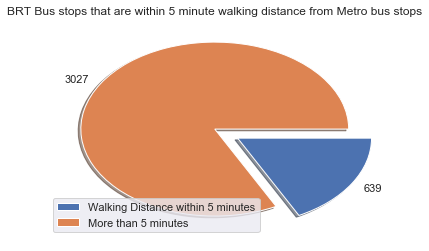

In [143]:
dfforplot = pd.DataFrame({'count': [len(weekday_bus_with_brt_distance[weekday_bus_with_brt_distance['distance_to_brt'] <= 0.0013]), len(weekday_bus_with_brt_distance[weekday_bus_with_brt_distance['distance_to_brt'] > 0.0013])]}, index=['Walking Distance within 5 minutes','More than 5 minutes'])

explode = (0.2, 0, )
plt.pie(dfforplot, labels= dfforplot['count'],explode=explode,counterclock=False, shadow=True)
plt.title('BRT Bus stops that are within 5 minute walking distance from Metro bus stops')
plt.legend(dfforplot.index,loc= 'lower left')
plt.show()


count    29.000000
mean      0.002063
std       0.001536
min       0.000045
25%       0.001026
50%       0.001940
75%       0.002667
max       0.006036
Name: distance_to_brt, dtype: float64

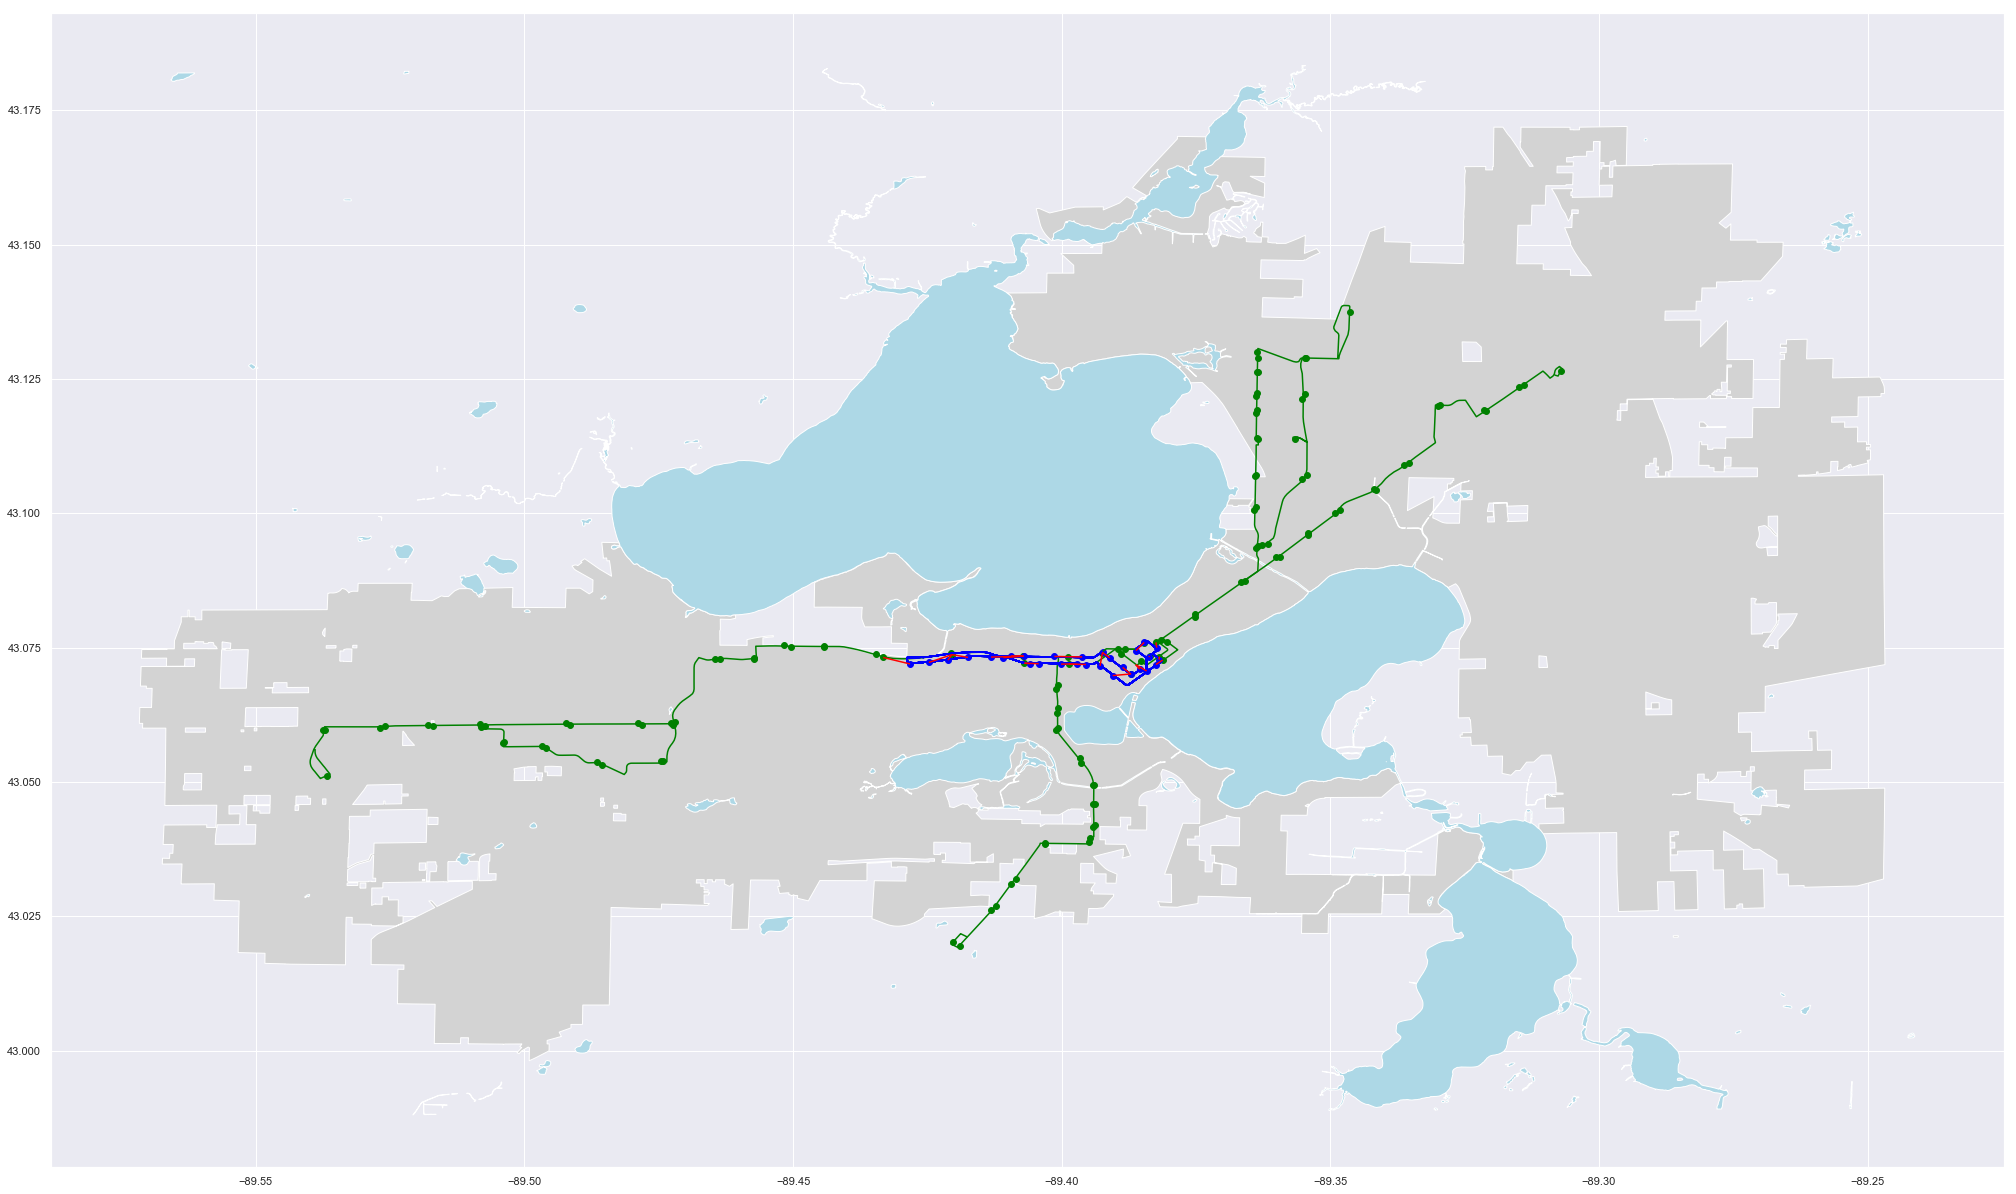

In [144]:
#bus 1 
ax = madison.plot(color="lightgray", figsize=(35,35))
lakes.plot(color="lightblue", ax=ax)
brt_coord.plot(color="green", ax=ax, markersize= 35)
brt_coord_line.plot(color="green", ax=ax)

route_number_table = weekday_bus_with_brt_distance[weekday_bus_with_brt_distance['Route'] == 1]
mapping(route_number_table)
route_number_table.distance_to_brt = route_number_table.distance_to_brt.astype(float)
route_number_table['distance_to_brt'].describe()

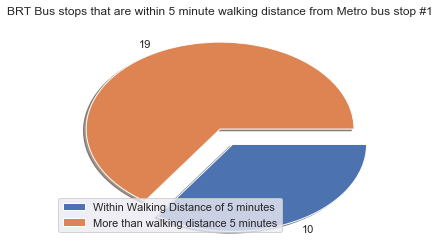

In [145]:
plotdf=pd.concat([route_number_table['StopID'], route_number_table['distance_to_brt']],axis=1, join_axes=[route_number_table['StopID'].index])
dfforplot = pd.DataFrame({'count': [len(plotdf[plotdf['distance_to_brt'] <= 0.0013]), len(plotdf[plotdf['distance_to_brt'] > 0.0013])]}, index=['Within Walking Distance of 5 minutes','More than walking distance 5 minutes'])

explode = (0.2, 0, )
plt.pie(dfforplot, labels= dfforplot['count'],explode=explode,counterclock=False, shadow=True)
plt.title('BRT Bus stops that are within 5 minute walking distance from Metro bus stop #1')
plt.legend(dfforplot.index,loc= 'lower left')
plt.show()


count    120.000000
mean       0.002834
std        0.002025
min        0.000005
25%        0.001095
50%        0.002685
75%        0.004397
max        0.007641
Name: distance_to_brt, dtype: float64

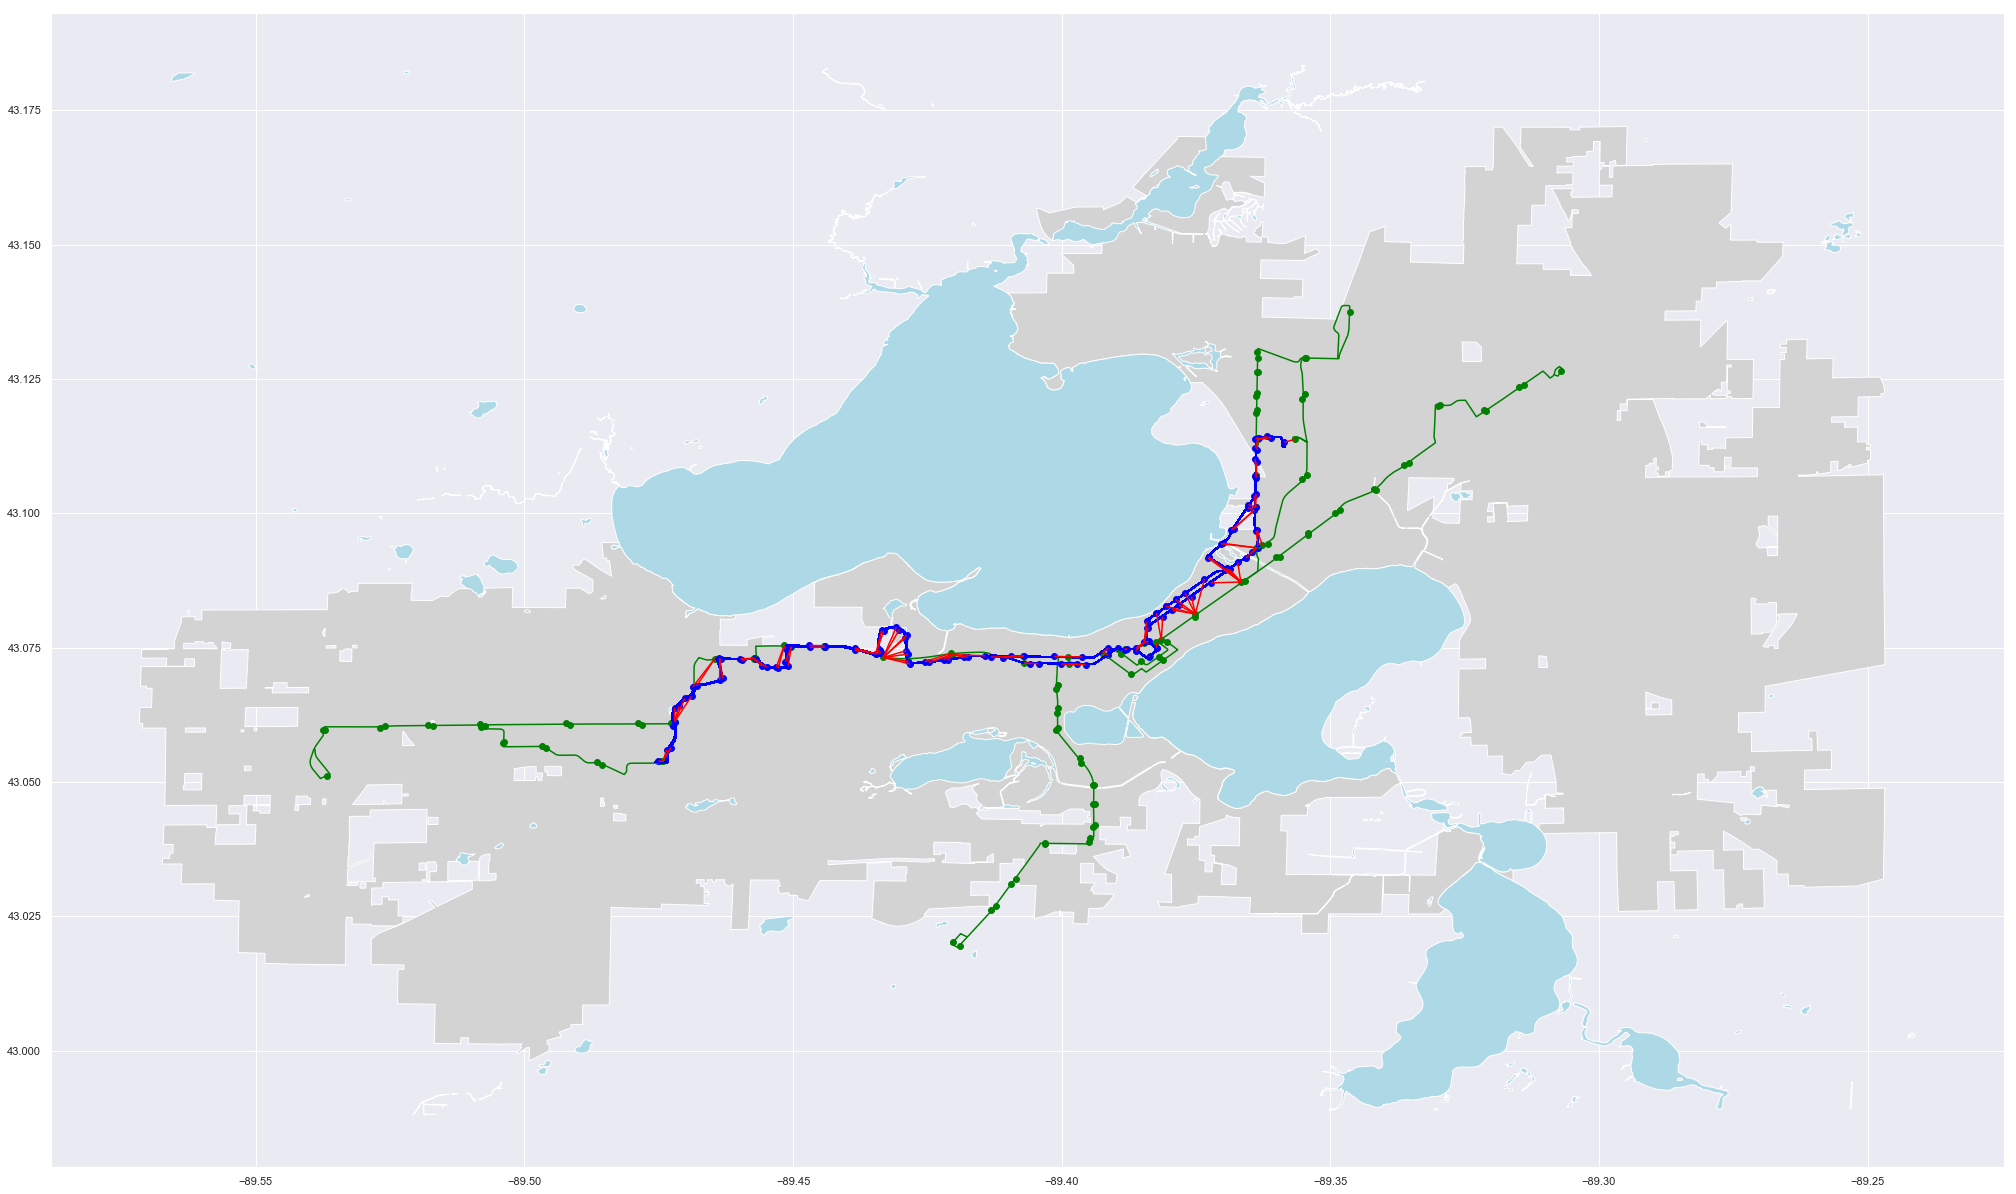

In [146]:
#bus 2
ax = madison.plot(color="lightgray", figsize=(35,35))
lakes.plot(color="lightblue", ax=ax)
brt_coord.plot(color="green", ax=ax, markersize= 35)
brt_coord_line.plot(color="green", ax=ax)
route_number_table = weekday_bus_with_brt_distance[weekday_bus_with_brt_distance['Route'] == 2]
mapping(route_number_table)
route_number_table.distance_to_brt = route_number_table.distance_to_brt.astype(float)
route_number_table['distance_to_brt'].describe()

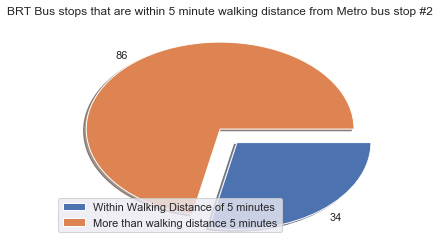

In [147]:
plotdf=pd.concat([route_number_table['StopID'], route_number_table['distance_to_brt']],axis=1, join_axes=[route_number_table['StopID'].index])
dfforplot = pd.DataFrame({'count': [len(plotdf[plotdf['distance_to_brt'] <= 0.0013]), len(plotdf[plotdf['distance_to_brt'] > 0.0013])]}, index=['Within Walking Distance of 5 minutes','More than walking distance 5 minutes'])

explode = (0.2, 0, )
plt.pie(dfforplot, labels= dfforplot['count'],explode=explode,counterclock=False, shadow=True)
plt.title('BRT Bus stops that are within 5 minute walking distance from Metro bus stop #2')
plt.legend(dfforplot.index,loc= 'lower left')
plt.show()


count    131.000000
mean       0.008491
std        0.006660
min        0.000045
25%        0.003766
50%        0.006469
75%        0.013299
max        0.024576
Name: distance_to_brt, dtype: float64

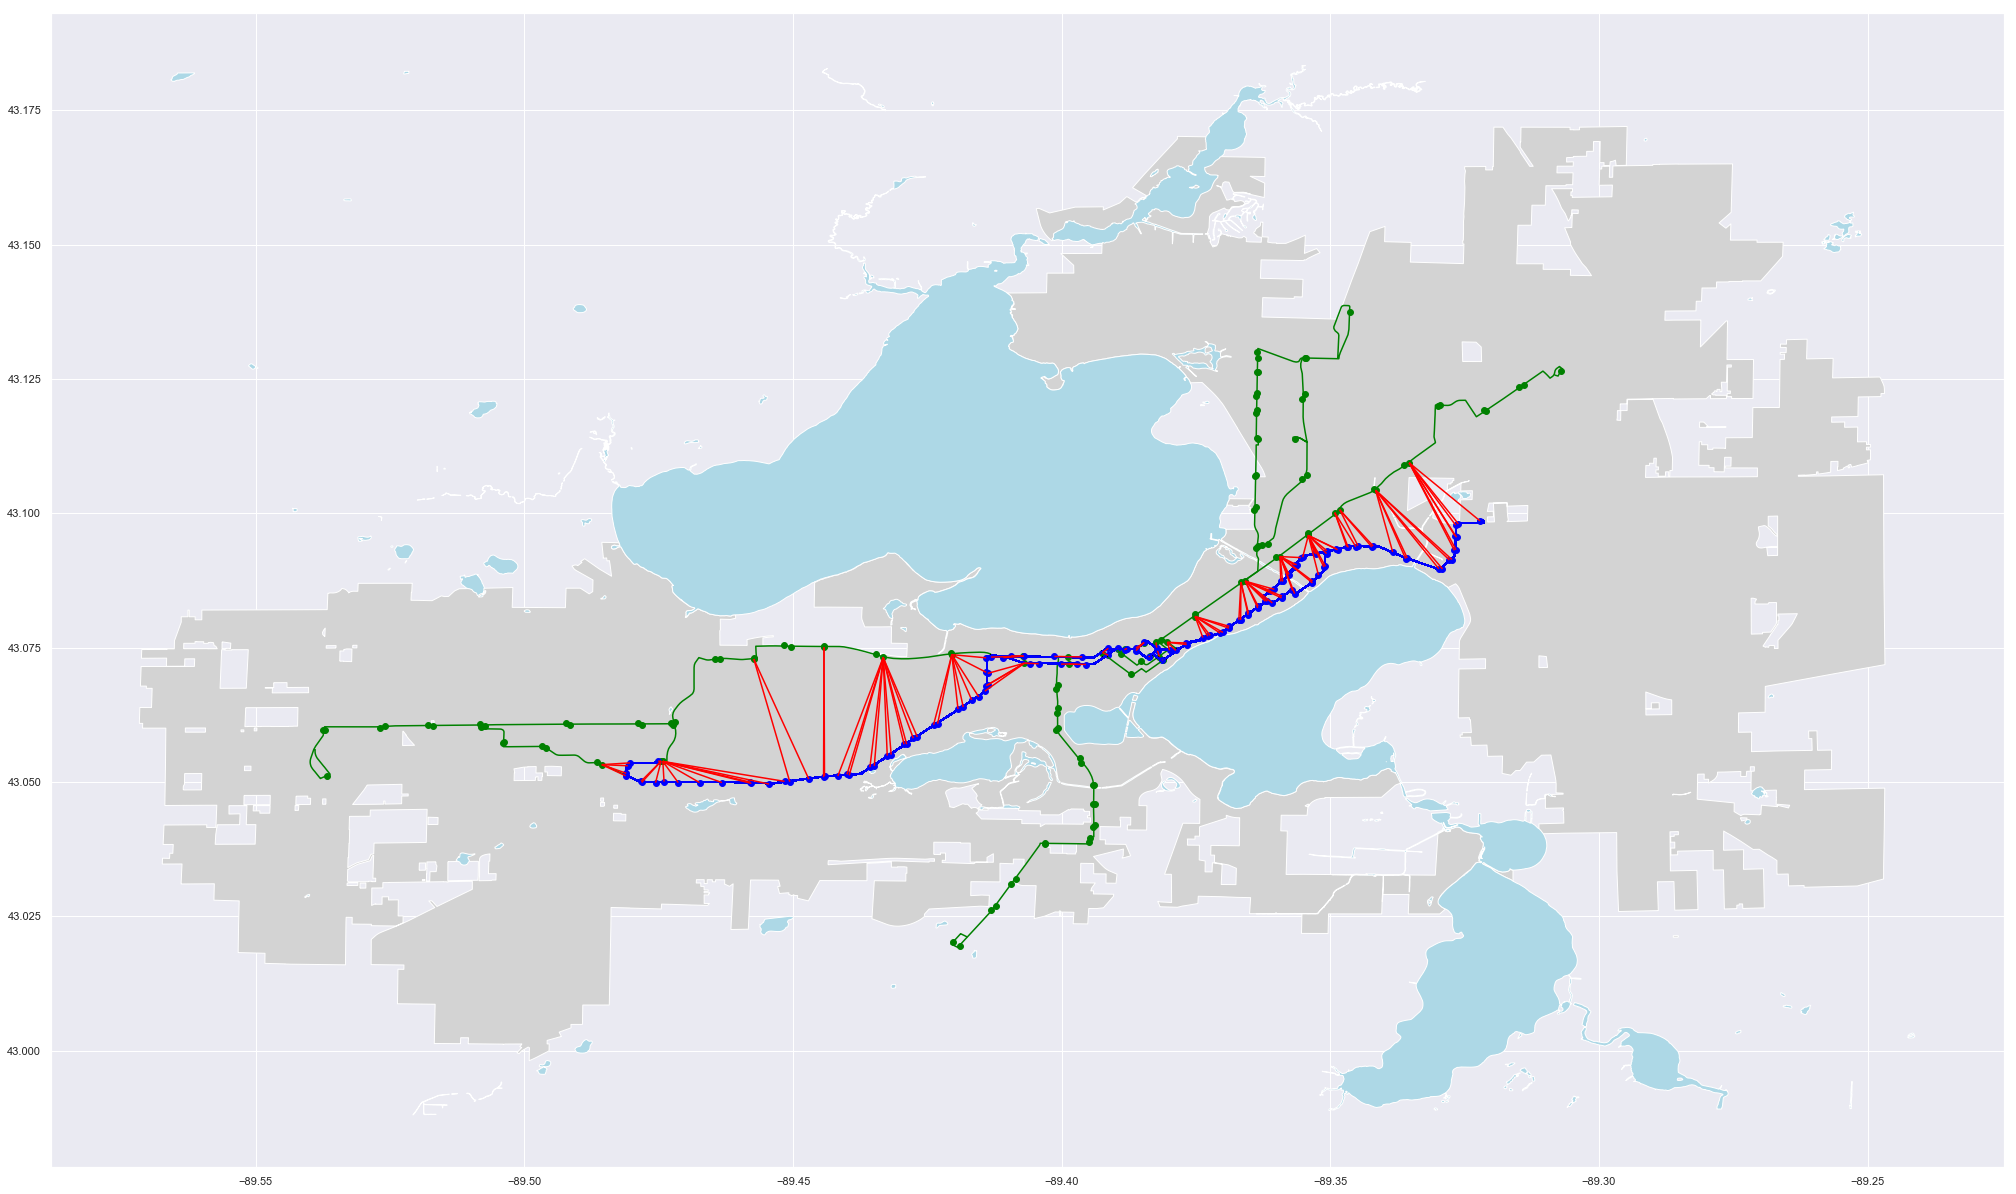

In [148]:
#bus 3
ax = madison.plot(color="lightgray", figsize=(35,35))
lakes.plot(color="lightblue", ax=ax)
brt_coord.plot(color="green", ax=ax, markersize= 35)
brt_coord_line.plot(color="green", ax=ax)
route_number_table = weekday_bus_with_brt_distance[weekday_bus_with_brt_distance['Route'] == 3]
mapping(route_number_table)
route_number_table.distance_to_brt = route_number_table.distance_to_brt.astype(float)
route_number_table['distance_to_brt'].describe()

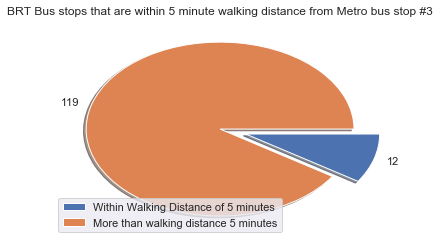

In [149]:
plotdf=pd.concat([route_number_table['StopID'], route_number_table['distance_to_brt']],axis=1, join_axes=[route_number_table['StopID'].index])
dfforplot = pd.DataFrame({'count': [len(plotdf[plotdf['distance_to_brt'] <= 0.0013]), len(plotdf[plotdf['distance_to_brt'] > 0.0013])]}, index=['Within Walking Distance of 5 minutes','More than walking distance 5 minutes'])

explode = (0.2, 0, )
plt.pie(dfforplot, labels= dfforplot['count'],explode=explode,counterclock=False, shadow=True)
plt.title('BRT Bus stops that are within 5 minute walking distance from Metro bus stop #3')
plt.legend(dfforplot.index,loc= 'lower left')
plt.show()


count    111.000000
mean       0.002941
std        0.001826
min        0.000045
25%        0.001523
50%        0.002893
75%        0.003803
max        0.007049
Name: distance_to_brt, dtype: float64

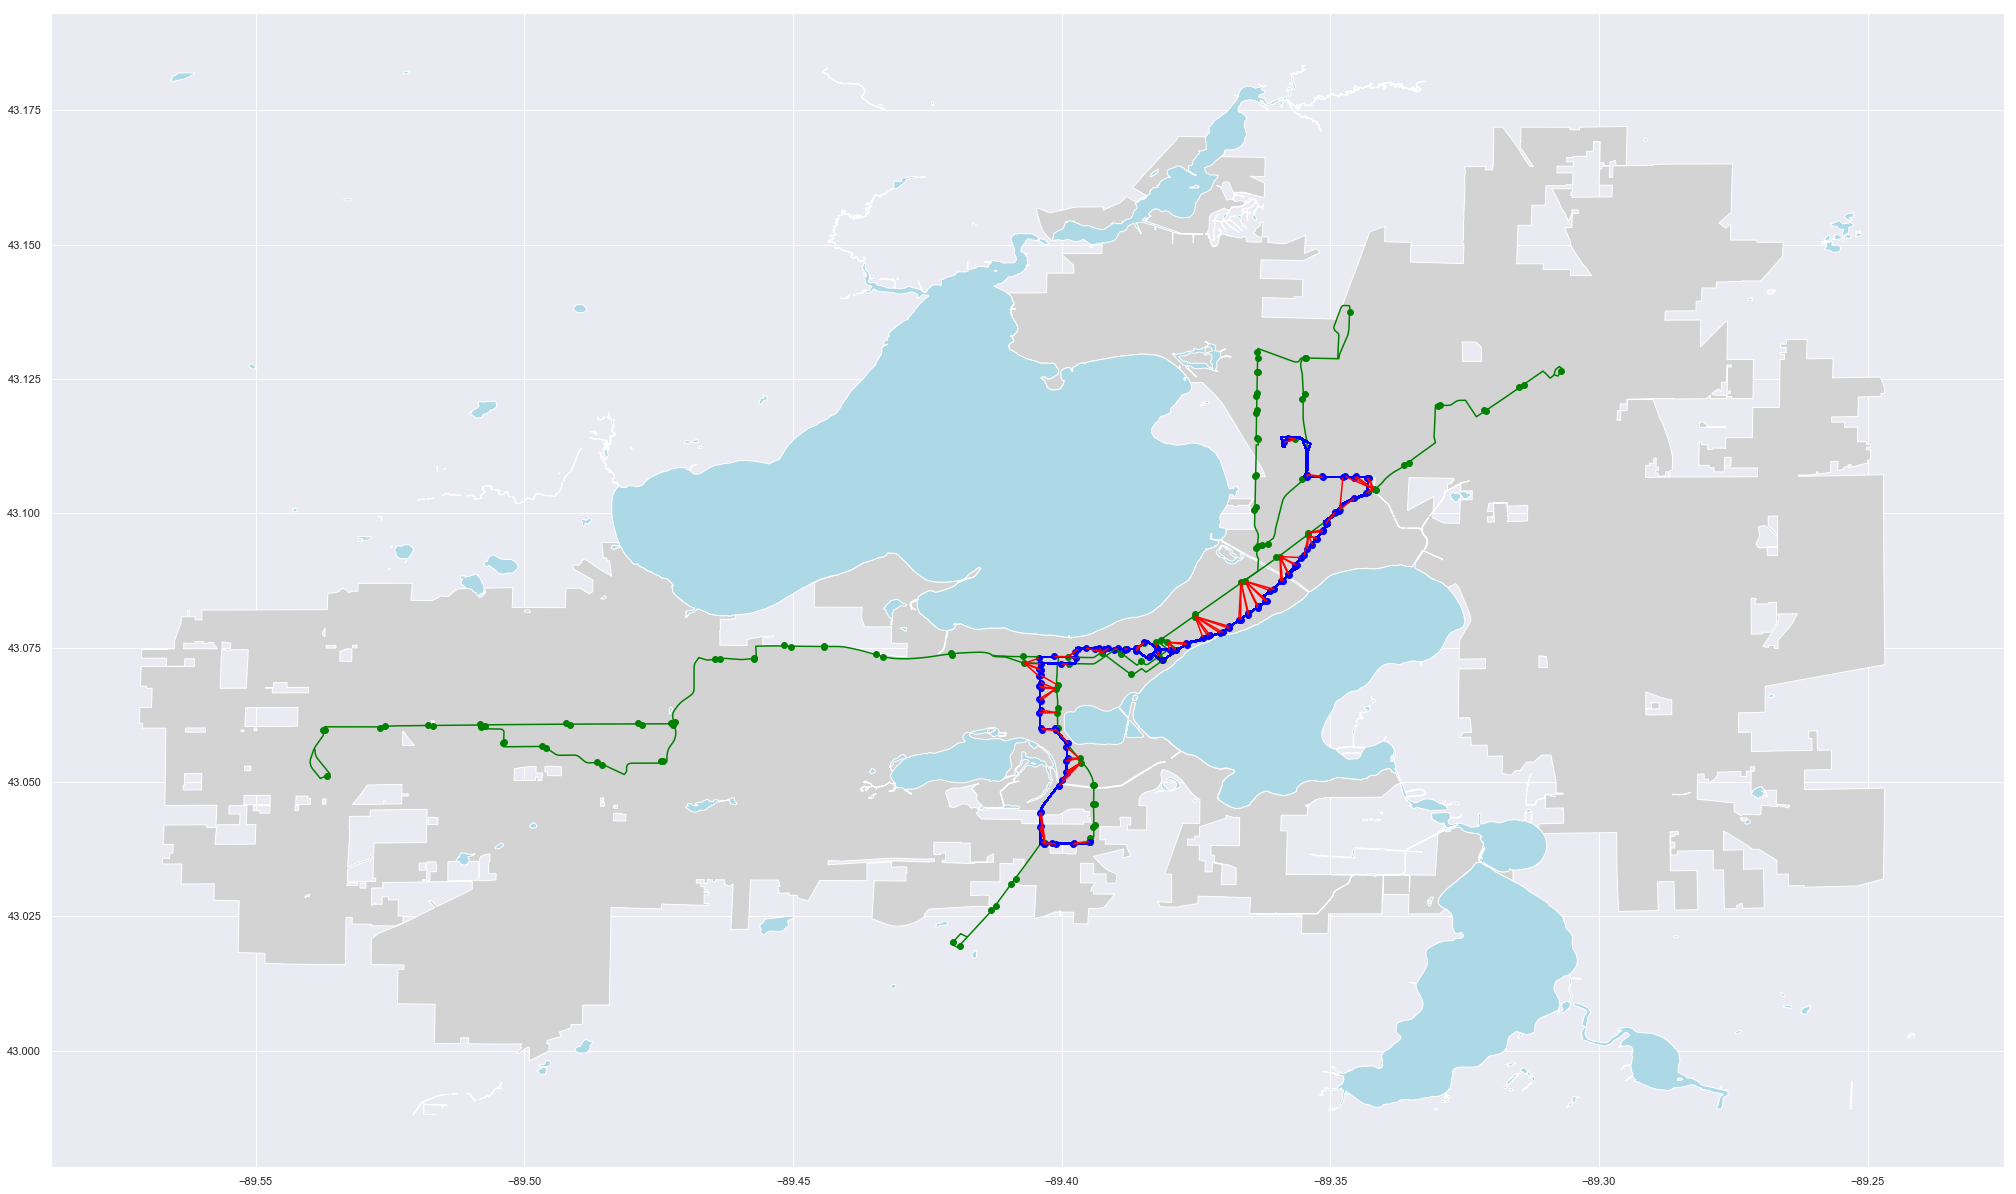

In [150]:
#bus 4
ax = madison.plot(color="lightgray", figsize=(35,35))
lakes.plot(color="lightblue", ax=ax)
brt_coord.plot(color="green", ax=ax, markersize= 35)
brt_coord_line.plot(color="green", ax=ax)
route_number_table = weekday_bus_with_brt_distance[weekday_bus_with_brt_distance['Route'] == 4]
mapping(route_number_table)
route_number_table.distance_to_brt = route_number_table.distance_to_brt.astype(float)
route_number_table['distance_to_brt'].describe()

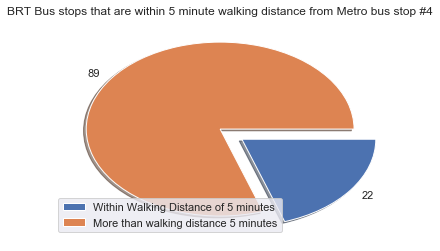

In [151]:
plotdf=pd.concat([route_number_table['StopID'], route_number_table['distance_to_brt']],axis=1, join_axes=[route_number_table['StopID'].index])
dfforplot = pd.DataFrame({'count': [len(plotdf[plotdf['distance_to_brt'] <= 0.0013]), len(plotdf[plotdf['distance_to_brt'] > 0.0013])]}, index=['Within Walking Distance of 5 minutes','More than walking distance 5 minutes'])

explode = (0.2, 0, )
plt.pie(dfforplot, labels= dfforplot['count'],explode=explode,counterclock=False, shadow=True)
plt.title('BRT Bus stops that are within 5 minute walking distance from Metro bus stop #4')
plt.legend(dfforplot.index,loc= 'lower left')
plt.show()


count    111.000000
mean       0.002941
std        0.001826
min        0.000045
25%        0.001523
50%        0.002893
75%        0.003803
max        0.007049
Name: distance_to_brt, dtype: float64

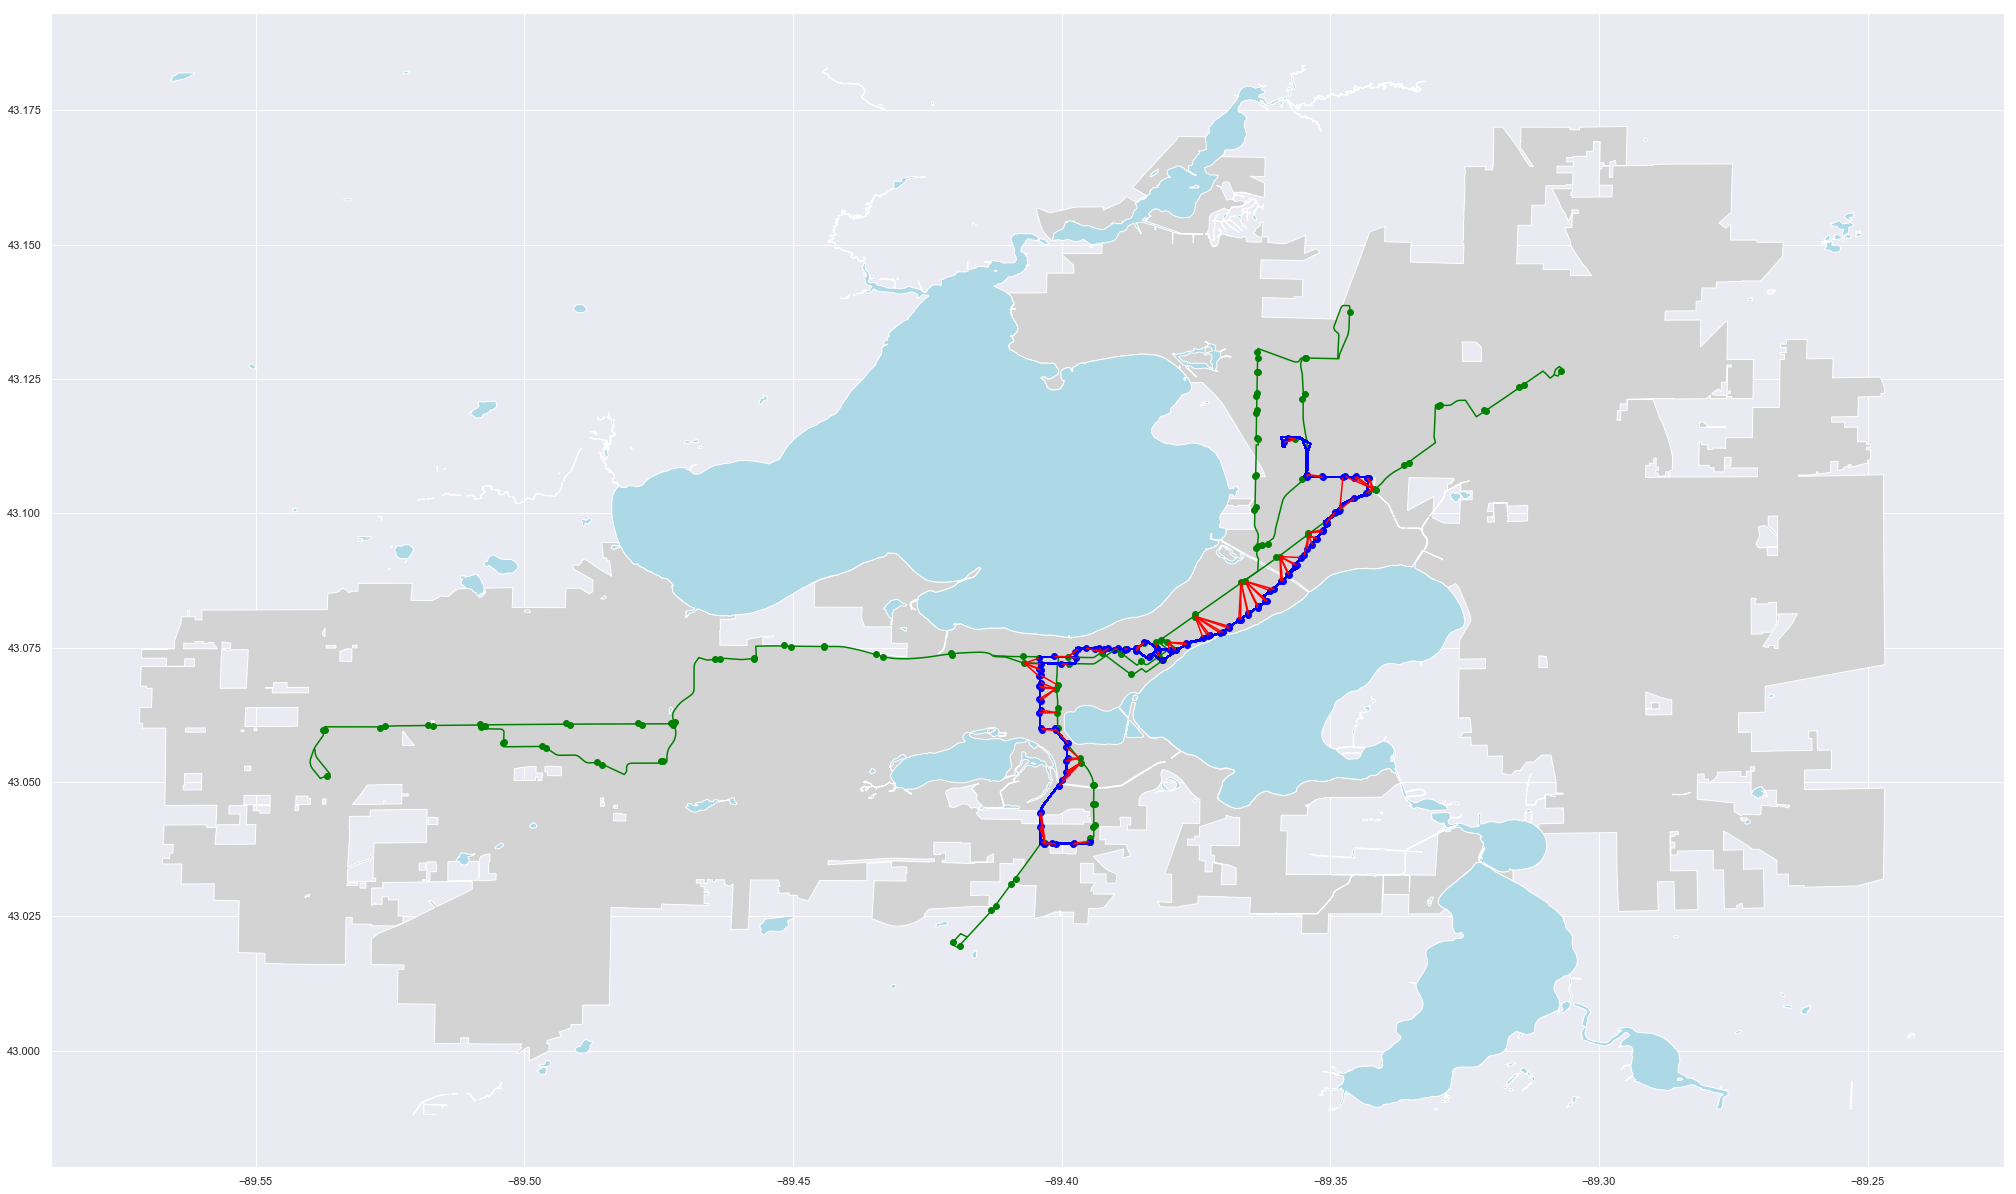

In [152]:
#bus 5
ax = madison.plot(color="lightgray", figsize=(35,35))
lakes.plot(color="lightblue", ax=ax)
brt_coord.plot(color="green", ax=ax, markersize= 35)
brt_coord_line.plot(color="green", ax=ax)
route_number_table = weekday_bus_with_brt_distance[weekday_bus_with_brt_distance['Route'] == 4]
mapping(route_number_table)
route_number_table.distance_to_brt = route_number_table.distance_to_brt.astype(float)
route_number_table['distance_to_brt'].describe()

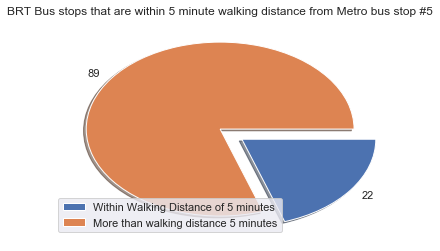

In [153]:
plotdf=pd.concat([route_number_table['StopID'], route_number_table['distance_to_brt']],axis=1, join_axes=[route_number_table['StopID'].index])
dfforplot = pd.DataFrame({'count': [len(plotdf[plotdf['distance_to_brt'] <= 0.0013]), len(plotdf[plotdf['distance_to_brt'] > 0.0013])]}, index=['Within Walking Distance of 5 minutes','More than walking distance 5 minutes'])

explode = (0.2, 0, )
plt.pie(dfforplot, labels= dfforplot['count'],explode=explode,counterclock=False, shadow=True)
plt.title('BRT Bus stops that are within 5 minute walking distance from Metro bus stop #5')
plt.legend(dfforplot.index,loc= 'lower left')
plt.show()


count    203.000000
mean       0.006652
std        0.005876
min        0.000018
25%        0.002120
50%        0.004999
75%        0.010871
max        0.021908
Name: distance_to_brt, dtype: float64

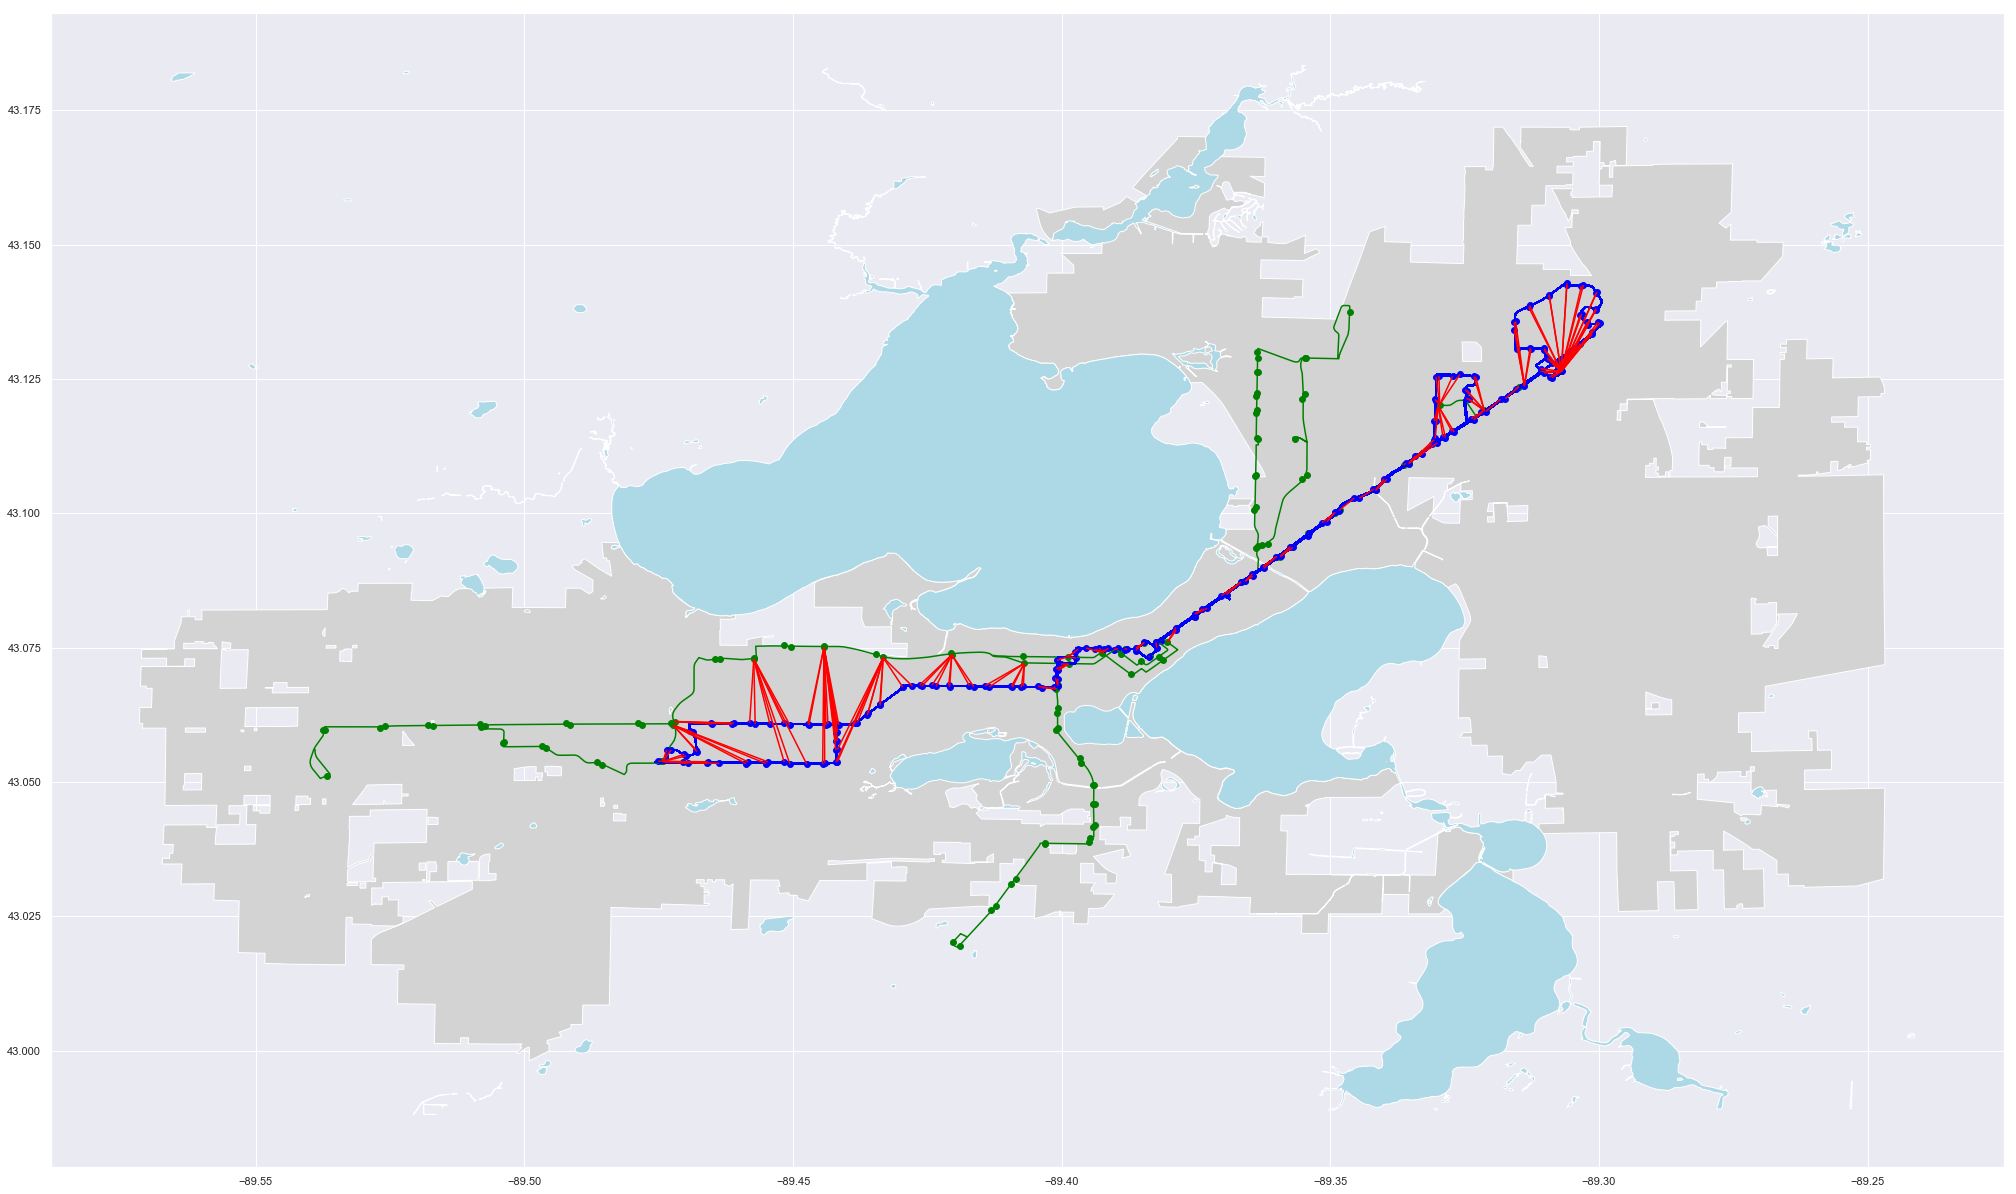

In [154]:
#bus 6
ax = madison.plot(color="lightgray", figsize=(35,35))
lakes.plot(color="lightblue", ax=ax)
brt_coord.plot(color="green", ax=ax, markersize= 35)
brt_coord_line.plot(color="green", ax=ax)
route_number_table = weekday_bus_with_brt_distance[weekday_bus_with_brt_distance['Route'] == 6]
mapping(route_number_table)
route_number_table.distance_to_brt = route_number_table.distance_to_brt.astype(float)
route_number_table['distance_to_brt'].describe()

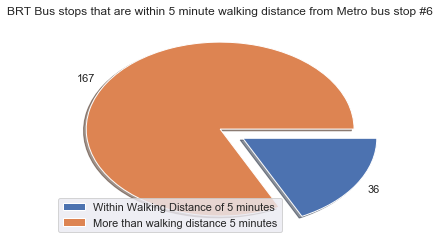

In [155]:
plotdf=pd.concat([route_number_table['StopID'], route_number_table['distance_to_brt']],axis=1, join_axes=[route_number_table['StopID'].index])
dfforplot = pd.DataFrame({'count': [len(plotdf[plotdf['distance_to_brt'] <= 0.0013]), len(plotdf[plotdf['distance_to_brt'] > 0.0013])]}, index=['Within Walking Distance of 5 minutes','More than walking distance 5 minutes'])

explode = (0.2, 0, )
plt.pie(dfforplot, labels= dfforplot['count'],explode=explode,counterclock=False, shadow=True)
plt.title('BRT Bus stops that are within 5 minute walking distance from Metro bus stop #6')
plt.legend(dfforplot.index,loc= 'lower left')
plt.show()


count    128.000000
mean       0.003176
std        0.001901
min        0.000017
25%        0.001758
50%        0.003175
75%        0.004531
max        0.007049
Name: distance_to_brt, dtype: float64

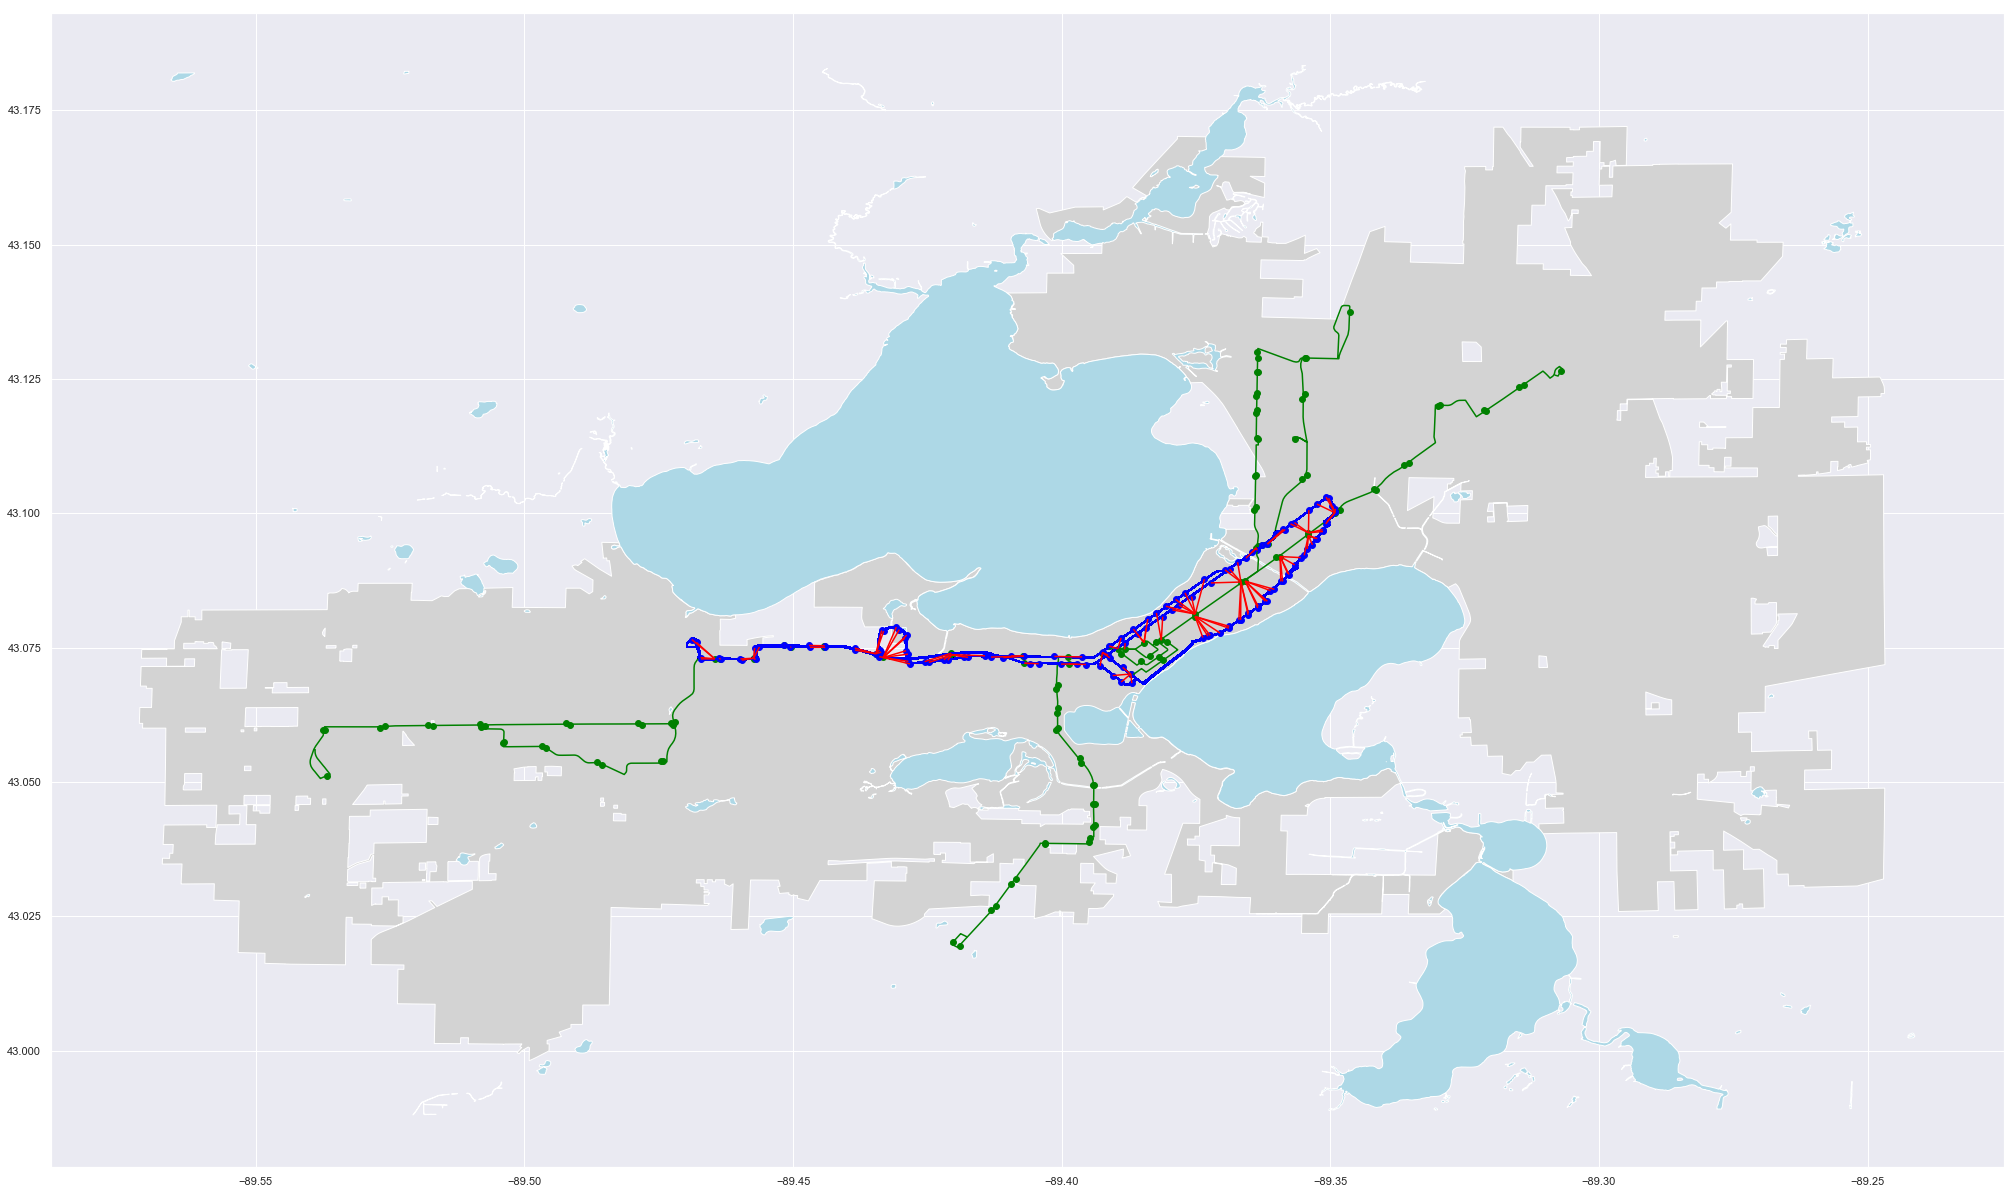

In [156]:
#bus 10
ax = madison.plot(color="lightgray", figsize=(35,35))
lakes.plot(color="lightblue", ax=ax)
brt_coord.plot(color="green", ax=ax, markersize= 35)
brt_coord_line.plot(color="green", ax=ax)
route_number_table = weekday_bus_with_brt_distance[weekday_bus_with_brt_distance['Route'] == 10]
mapping(route_number_table)
route_number_table.distance_to_brt = route_number_table.distance_to_brt.astype(float)
route_number_table['distance_to_brt'].describe()

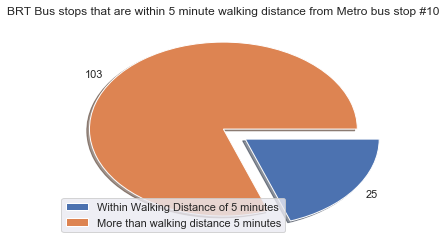

In [157]:
plotdf=pd.concat([route_number_table['StopID'], route_number_table['distance_to_brt']],axis=1, join_axes=[route_number_table['StopID'].index])
dfforplot = pd.DataFrame({'count': [len(plotdf[plotdf['distance_to_brt'] <= 0.0013]), len(plotdf[plotdf['distance_to_brt'] > 0.0013])]}, index=['Within Walking Distance of 5 minutes','More than walking distance 5 minutes'])

explode = (0.2, 0, )
plt.pie(dfforplot, labels= dfforplot['count'],explode=explode,counterclock=False, shadow=True)
plt.title('BRT Bus stops that are within 5 minute walking distance from Metro bus stop #10')
plt.legend(dfforplot.index,loc= 'lower left')
plt.show()


In [158]:
dfforplot

,count
Within Walking Distance of 5 minutes,25
More than walking distance 5 minutes,103


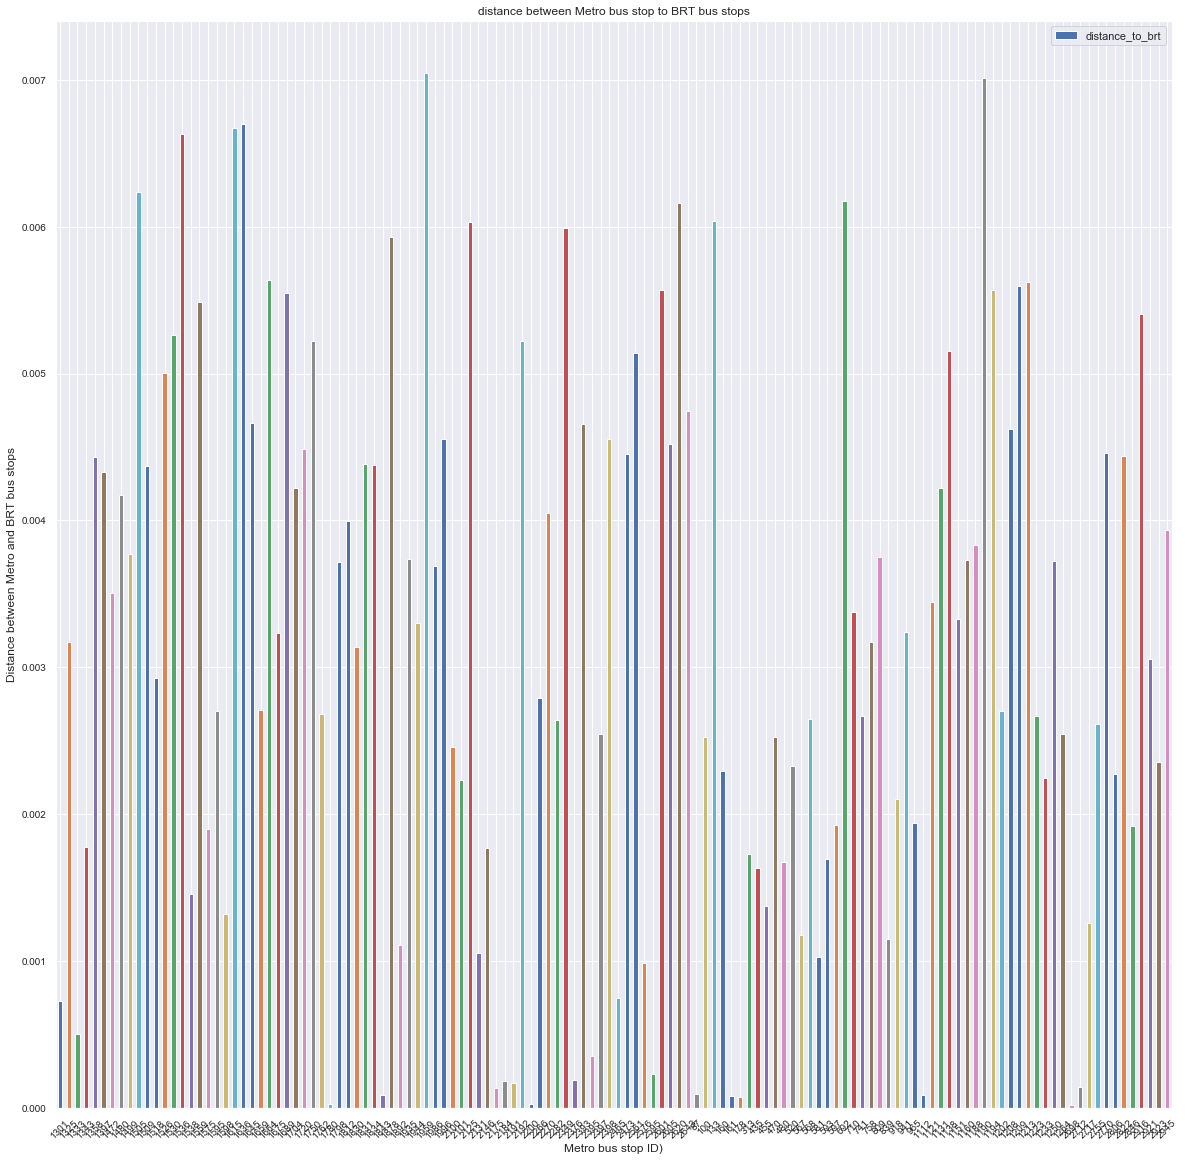

In [96]:
# plotdf=pd.concat([route_number_table['StopID'], route_number_table['distance_to_brt']],axis=1, join_axes=[route_number_table['StopID'].index])
# below = plotdf[plotdf['distance_to_brt'] =< 0.00001]
# above = plotdf[plotdf['distance_to_brt'] > 0.00001]
# plotdf=plotdf.plot(kind='bar', title="distance between Metro bus stop to BRT bus stops",x='StopID',y='distance_to_brt',rot=45,figsize=(20,20),fontsize=10)
# plotdf.set_ylabel("Distance between Metro and BRT bus stops")
# plotdf.set_xlabel("Metro bus stop ID)")

# # use axhline
# minimum_distance = 0.00001
# ax.axhline(minimum_distance)


In [67]:
route_number_table.sort_values(by=['StopID'])


,OBJECTID,StopID,Route,Lat,Lon,DailyBoard,DotSize,brt_index,distance_to_brt,geometry
1741,16416,87,10,43.074150,-89.392328,31.38,313817.27,104,0.000093,POINT (-89.39232196940478 43.07414205676322)
1753,16428,100,10,43.073399,-89.401365,279.60,2795978.30,12,0.002528,POINT (-89.40135896641139 43.07339105758655)
1791,16466,133,10,43.073275,-89.413154,32.88,328840.43,13,0.006036,POINT (-89.41314796382585 43.07326705856391)
1809,16484,160,10,43.073481,-89.409413,197.97,1979719.56,13,0.002292,POINT (-89.40940696370511 43.07347305834185)
1823,16498,161,10,43.070146,-89.387071,90.31,903059.26,107,0.000080,POINT (-89.38706497116137 43.07013805788525)
1849,16524,178,10,43.073427,-89.407056,277.93,2779285.89,13,0.000072,POINT (-89.40704996458905 43.07341905832253)
1949,16624,313,10,43.068418,-89.386949,8.35,83462.04,107,0.001726,POINT (-89.38694297091138 43.06841005769889)
1996,16671,435,10,43.071921,-89.397094,28.71,287109.41,1,0.001636,POINT (-89.39708796829248 43.071913057717)
2029,16704,455,10,43.071967,-89.400106,70.44,704419.61,1,0.001377,POINT (-89.40009996763025 43.07195905825976)
2058,16733,470,10,43.071625,-89.392860,1.50,15023.17,104,0.002529,POINT (-89.39285396972866 43.07161705789257)


In [83]:
route_number_table.StopID.value_counts() == 2
print_full(route_number_table.StopID.value_counts())

1160    1
1325    1
1131    1
1333    1
581     1
839     1
2376    1
2822    1
2125    1
1358    1
1615    1
1636    1
2131    1
597     1
1878    1
87      1
1112    1
2393    1
2395    1
2397    1
2398    1
470     1
2146    1
100     1
1208    1
1223    1
1530    1
2200    1
1645    1
1250    1
1138    1
1343    1
1598    1
2620    1
1575    1
2561    1
1538    1
1526    1
1798    1
520     1
1509    1
2576    1
1812    1
1301    1
1559    1
1209    1
2846    1
2595    1
1830    1
1595    1
1831    1
809     1
1834    1
2712    1
2605    1
1892    1
1843    1
2100    1
2101    1
2601    1
567     1
568     1
313     1
1397    1
2349    1
1659    1
1499    1
2755    1
965     1
710     1
455     1
1480    1
1996    1
1233    1
2770    1
2806    1
2923    1
1750    1
593     1
2266    1
2270    1
1472    1
480     1
1505    1
1762    1
1151    1
741     1
1121    1
2282    1
1518    1
1264    1
1780    1
758     1
2191    1
2643    1
1986    1
161     1
2175    1
160     1
1664    1
